# (Ford GoBike Data Exploration)
## by (Hamad Sami AlAssafi)

## Preliminary Wrangling

> This Document Explores a dataset containing data about bike-racing attributes for approximately 519700 bike.

In [117]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [118]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [119]:
print(df.shape)

(519700, 13)


In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB
N

In [121]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [122]:
#Change some the variables data type to more appropriate data type

#start_time and end_time from object AKA string to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#user_type from object AKA string to category 
df['user_type'] = df.user_type.astype('category')

In [123]:
#To check if the data types changed or not
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
dtype: object

### What is the structure of your dataset?

> There are 519700 bike in our dataset with 13 feature (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id ,end_station_name, end_station_latitude, end_station_longitude, bike_id and, user_type), most of the variables are numeric, and some of them categorical variables.
### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the fastest why to end the race of the Ford GoBike dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the duration_sec,start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, start_station_name and, user_type is the most helpful features to help my go through the investigation part in our dataset

## Univariate Exploration

> I will start looking at the distrubtion of duration per second 

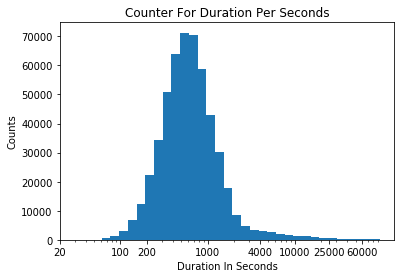

In [124]:
bin_edegs = 10 ** np.arange(1.785, 4.936+0.1, 0.1)
ticks = [20,100,200,1000,4000,10000,25000, 60000]
labels = ['{}' .format(v) for v in ticks]
plt.hist(data = df, x = 'duration_sec' , bins = bin_edegs);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title('Counter For Duration Per Seconds');
plt.xlabel('Duration In Seconds');
plt.ylabel('Counts');

> It looks like most of the racers have finished the race in between (200 Seconds) to (1000 Seconds), and there is outliers in our disturabtion because some of the racers have finished the race in (60000 Seconds) and some of them took more than (60000 Seconds)

In [125]:
#I will remove the outliers in Duration Per Second variable

#Each row that have more than (15000) Second will be removed because it is considered as outlier
df.drop(df[df.duration_sec > 15000].index, inplace=True)
#Each row that have less than (100) Second will be removed because it is considered as outlier
df.drop(df[df.duration_sec < 100].index, inplace=True)

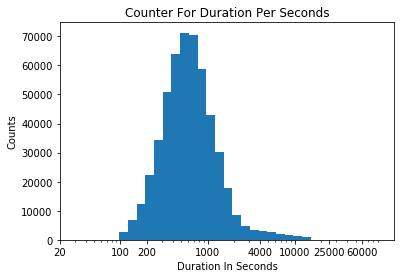

In [126]:
bin_edegs = 10 ** np.arange(1.785, 4.936+0.1, 0.1)
ticks = [20,100,200,1000,4000,10000,25000, 60000]
labels = ['{}' .format(v) for v in ticks]
plt.hist(data = df, x = 'duration_sec' , bins = bin_edegs);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title('Counter For Duration Per Seconds');
plt.xlabel('Duration In Seconds');
plt.ylabel('Counts');

>Now the disturabtion looks more accurate when we want to preform analysis, because the outliers has been deleted

>Now i will go through the start_station_latitude and end_station_latitude as will as start_station_longitude and end_station_longitude to see what is the difference between them, and if there is any outliers.

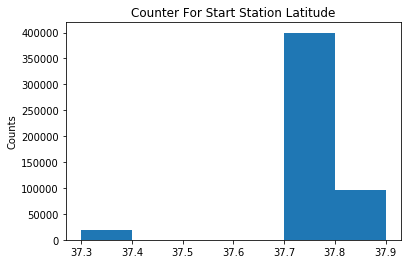

In [127]:
ticks = [37.3,37.4,37.5,37.6,37.7,37.7,37.8,37.9,]
plt.hist(data = df, x = 'start_station_latitude', bins = ticks);
plt.title('Counter For Start Station Latitude');
plt.ylabel('Counts');

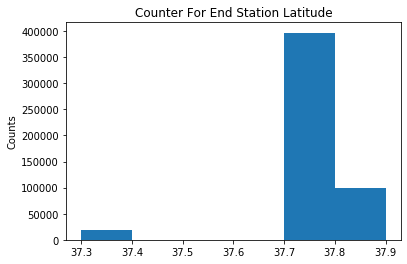

In [128]:
ticks = [37.3,37.4,37.5,37.6,37.7,37.7,37.8,37.9,]
plt.hist(data = df, x = 'end_station_latitude', bins = ticks);
plt.title('Counter For End Station Latitude');
plt.ylabel('Counts');

> It seems that the end and start station latitude is similar, and the most frequent latitude is between (37.7, 37.8) for the start as will as the end.

In [129]:
#Each row that have less than (37.7) will be removed because it is considered as outlier
df.drop(df[df.start_station_latitude < 37.7].index, inplace=True)

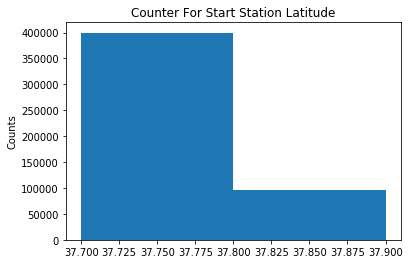

In [130]:
ticks = [37.7,37.8,37.9]
plt.hist(data = df, x = 'start_station_latitude', bins = ticks);
plt.title('Counter For Start Station Latitude');
plt.ylabel('Counts');

In [131]:
#Each row that have less than (37.7) will be removed because it is considered as outlier
df.drop(df[df.end_station_latitude < 37.7].index, inplace=True)

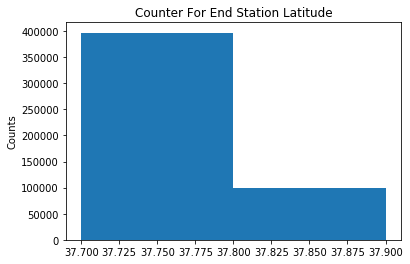

In [132]:
ticks = [37.7,37.8,37.9]
plt.hist(data = df, x = 'end_station_latitude', bins = ticks);
plt.title('Counter For End Station Latitude');
plt.ylabel('Counts');

>Now after we have removed the outliers from the end and start station latitude the distrbution looks more interepetable and more accurate

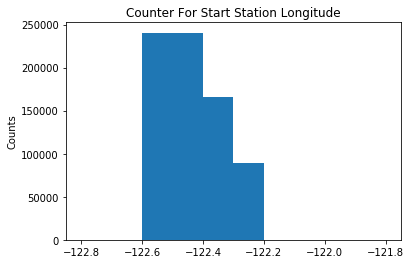

In [133]:
List = [-122.8,-122.6,-122.4,-122.3,-122.2,-122.1,-122.0,-121.9,-121.8]
plt.hist(data = df, x = 'start_station_longitude', bins = List);
plt.title('Counter For Start Station Longitude');
plt.ylabel('Counts');

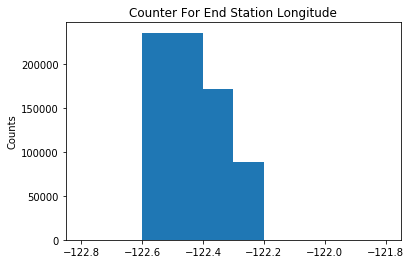

In [134]:
plt.hist(data = df, x = 'end_station_longitude', bins = List );
plt.title('Counter For End Station Longitude');
plt.ylabel('Counts');

> It seems that the end and start station longitude is similar, and the most frequent longitude is between (-122.6, -122.4) for the start as will as the end.

In [135]:
#Each row that have more than or equal (-122.0) will be removed because it is considered as outlier
df.drop(df[df.start_station_longitude >= -122.0].index, inplace=True)

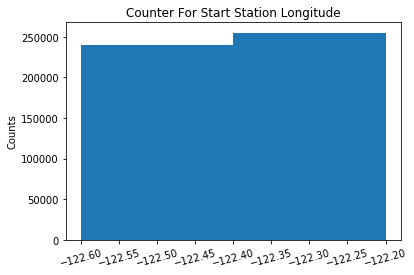

In [136]:
List = [-122.6,-122.4,-122.2]
plt.hist(data = df, x = 'start_station_longitude', bins = List);
plt.title('Counter For Start Station Longitude');
plt.ylabel('Counts');
plt.xticks(rotation = 15);

In [137]:
#Each row that have more than or equal (-122.0) will be removed because it is considered as outlier
df.drop(df[df.end_station_longitude >= -122.0].index, inplace=True)

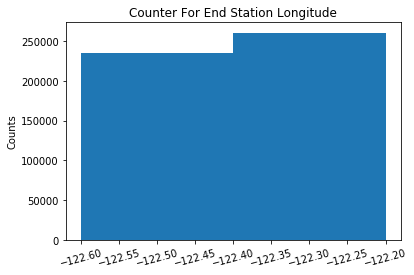

In [138]:
List = [-122.6,-122.4,-122.2]
plt.hist(data = df, x = 'end_station_longitude', bins = List);
plt.title('Counter For End Station Longitude');
plt.ylabel('Counts');
plt.xticks(rotation = 15);

>Now after we have removed the outliers from the end and start station latitude the distrbution looks more interepetable and more accurate

>Now I will go through the user_type variable, which is categorical variable and should be plotted in bar chart

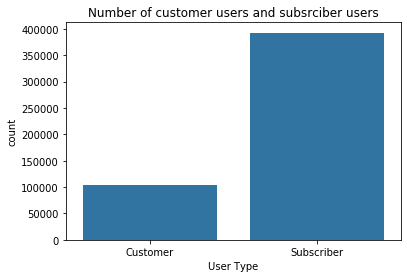

In [139]:
df_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = df_color);
plt.xlabel('User Type');
plt.title('Number of customer users and subsrciber users');

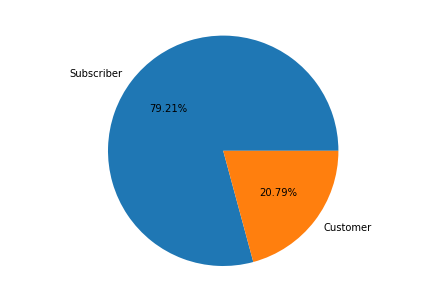

In [140]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Subscriber', 'Customer']
ax.pie(df.user_type.value_counts(), labels = langs,autopct='%1.2f%%');
plt.show();

> We Have two type of users (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual), in our dataset we have up to (400000) subsrcibers and almost (110000) customers is it showns in the bar chart, and the pie chart shows that is (79.21) of the users is (Subscribers).

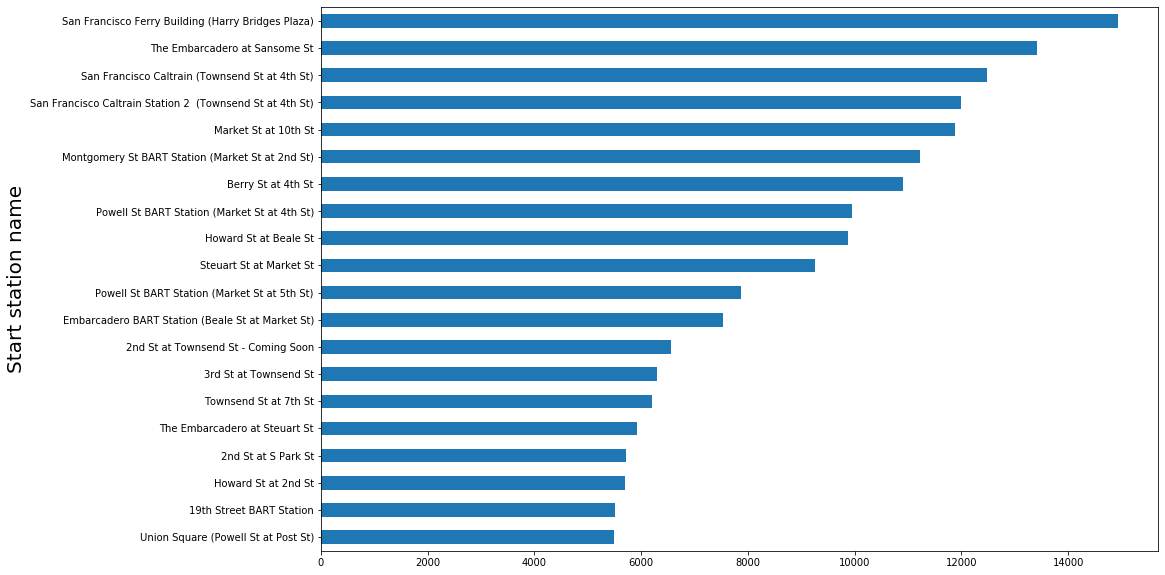

In [141]:
plt.figure(figsize=[15, 10]);
df['start_station_name'].value_counts().sort_values().tail(20).plot(kind='barh');
plt.ylabel('Start station name',fontsize=20);

>Most of the racers starts at San Franciso Ferry Buliding station.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration per second variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between 500 Sec and 1000 Sec. Most of the users are (Subscribers).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the duration per second, the both two station latitude, and the both two station longitude variables, a number of outlier points were identified. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

> Firstly, I will look at the relationship between (duration_sec) and (user_type) using violing plot

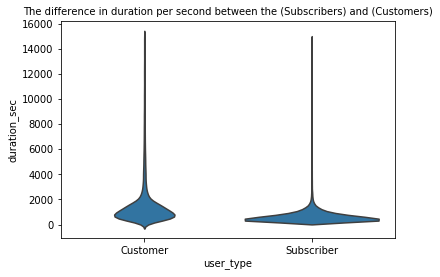

In [142]:
sb.violinplot(data = df, x = 'user_type', y = 'duration_sec',color = df_color, inner = None);
plt.title('The difference in duration per second between the (Subscribers) and (Customers)', size = 10);

>It is looks like the (Subscribers) often finish the race faster than the (Customers)

>Now I will take look at the relationship between (duration_sec) and (start_station_latitude), (duration_sec) and (end_station_latitude) using scatter plot.

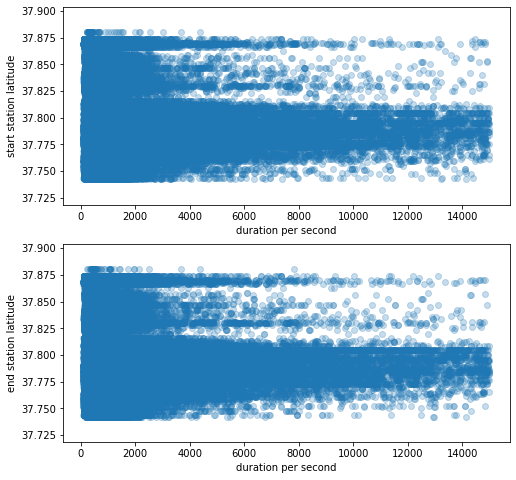

In [143]:
plt.figure(figsize= [8,8])
plt.subplot(2, 1, 1)
plt.scatter(data = df, x = 'duration_sec', y = 'start_station_latitude', color = df_color,alpha = 1/4)
plt.xlabel('duration per second')
plt.ylabel('start station latitude')
plt.subplot(2, 1, 2)
plt.scatter(data = df, x = 'duration_sec', y = 'end_station_latitude' ,color = df_color,alpha = 1/4)
plt.xlabel('duration per second')
plt.ylabel('end station latitude')
plt.show()

>It looks like the fastest way to finish the race if you latitude between (37.750) and (37.875)

>Now I will take look at the relationship between (duration_sec) and (start_station_longitude), (duration_sec) and (end_station_longitude) using scatter plot.

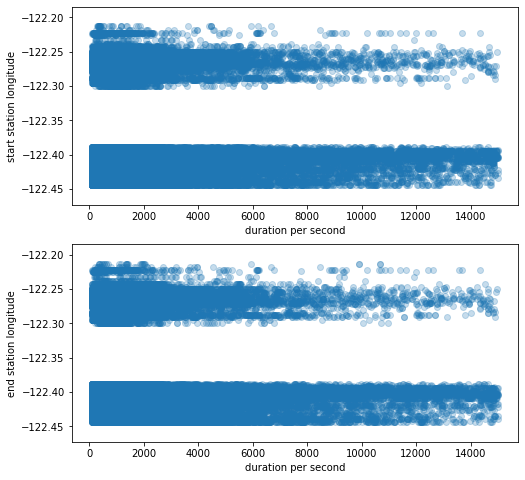

In [144]:
plt.figure(figsize= [8,8])
plt.subplot(2, 1, 1)
plt.scatter(data = df, x = 'duration_sec', y = 'start_station_longitude', color = df_color, alpha = 1/4)
plt.xlabel('duration per second')
plt.ylabel('start station longitude')
plt.subplot(2, 1, 2)
plt.scatter(data = df, x = 'duration_sec', y = 'end_station_longitude' ,color = df_color, alpha = 1/4)
plt.xlabel('duration per second')
plt.ylabel('end station longitude')
plt.show()

>It looks like the fastest way to finish the race if you longitude between (-122.44) and (-122.23)

>Now I will take look at the relationship between (start_station_latitude) and (start_station_longitude), (end_station_latitude) and (end_station_longitude) using scatter plot.

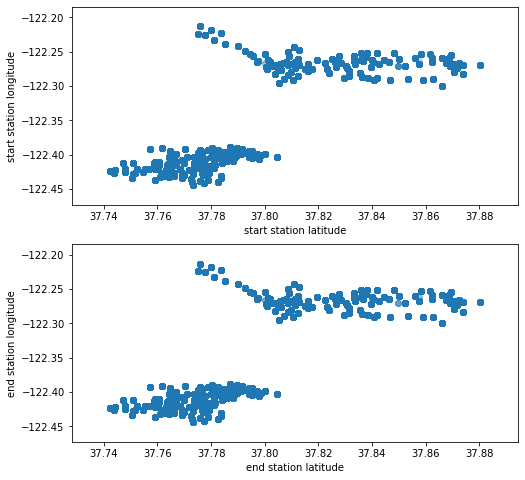

In [145]:
plt.figure(figsize= [8,8])
plt.subplot(2, 1, 1)
plt.scatter(data = df, x = 'start_station_latitude', y = 'start_station_longitude', color = df_color, alpha = 1/4)
plt.xlabel('start station latitude')
plt.ylabel('start station longitude')
plt.subplot(2, 1, 2)
plt.scatter(data = df, x = 'end_station_latitude', y = 'end_station_longitude' ,color = df_color, alpha = 1/4)
plt.xlabel('end station latitude')
plt.ylabel('end station longitude')
plt.show()

>The scatter plot shows that the most frequent latitude and longitude is between (37.76) and (37.80) for the latitude, (-122.43) and (-122.4) for the longitude

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The user type have large affect in the duration per seconds, because most we have saw that the fastest user type is the (Subscribers) type. There are relationship between the duration per second and the longitude and latitude if the latitude is between (37.750) and (37.875) then you most likely will finish the race faster, as will as the longitude if your longitude is between (-122.44) and (-122.23) then you most likely will finish the race faster.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The most frequent longitude and latitude is between (37.76) and (37.80) for the latitude, (-122.43) and (-122.4) for the longitude

## Multivariate Exploration

>I will look at the relationship between (duration_sec), (start_station_longitude), and (user_type), then i will look the relationship between (duration_sec), (start_station_latitude), and (user_type). In both plots i will use point plot with Non-Positional Encoding.


>I will create new variable in our dataframe that containts the (duration per minute), but I will get rid of the fractions, so the accuracy maybe will be less, but the plot will become more interpetable

In [146]:
df['duration_min'] = df['duration_sec'] // 60
#To make that the seconds have converted correctly to minutes
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min
5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,153
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,75
7,4334,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,72
8,4150,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,69
9,4238,2017-12-31 23:35:38.145,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,70


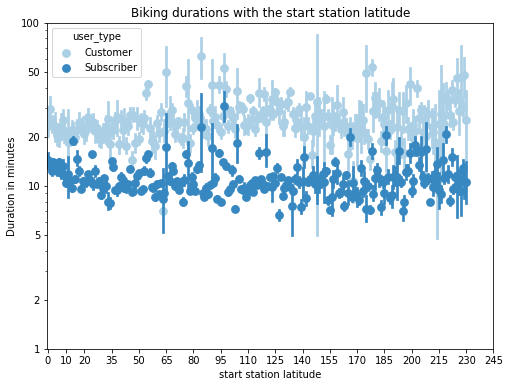

In [147]:
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = df, x = 'start_station_latitude', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '');
plt.title('Biking durations with the start station latitude')
plt.xlabel('start station latitude')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xticks([0,10,20,35,50,65,80,95,110,125,140,155,170,185,200,215,230,245],[0,10,20,35,50,65,80,95,110,125,140,155,170,185,200,215,230,245]);
ax.set_yticklabels([],minor = True);

Most of the (Subscribers) finished the race faster than the (Customers), and the most frequent latitude for the (Subscribers) is (65), and for the the (Customers) is (155)

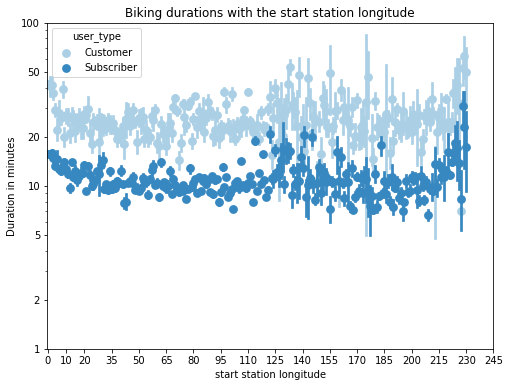

In [148]:
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = df, x = 'start_station_longitude', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '');
plt.title('Biking durations with the start station longitude')
plt.xlabel('start station longitude')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xticks([0,10,20,35,50,65,80,95,110,125,140,155,170,185,200,215,230,245],[0,10,20,35,50,65,80,95,110,125,140,155,170,185,200,215,230,245]);
ax.set_yticklabels([],minor = True);

>Most of the (Subscribers) finished the race faster than the (Customers), and the most frequent longitude for the (Subscribers) is between (215) and (230), and for the the (Customers) is between (170) and (185)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation further more with the the duration and the user type and the longitude and latitude, the plots shows that the (Subscribers) user type is faster than the (Customers) user type.

### Were there any interesting or surprising interactions between features?

> I noticed that the (Subscribers) user type uses higher longitude and latitude, and that maybe will be an indicator of why the are faster than the (Customers) user type.

In [149]:
#Store the cleaned (CSV) file to use it in the presnetation step
df.to_csv('clean_file.csv', index=False)

## Refrences

> https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.xticks.html


>https://seaborn.pydata.org/generated/seaborn.violinplot.html


>https://www.geeksforgeeks.org/python-program-to-convert-seconds-into-hours-minutes-and-seconds/